<a href="https://colab.research.google.com/github/raflidzaky/scraping-wikipedia/blob/main/Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Settings

In [10]:
# Libraries to scrape and access the site
from bs4 import BeautifulSoup
import requests as req

# Library to convert the data as DataFrame
import pandas as pd

# Library for data viz
import matplotlib.pyplot as plt

## Getting the requirements.txt
In case you want to clone this project and further analyze it, you could go with above library using below requirements.txt. As you go with the clone project, you can add more library if needed.

In [11]:
!pip install session-info

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=899e91f20c01d1fc5c299bba13f071c510c96b925067f0d37aa3400ac4cc52e4
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [12]:
import session_info
session_info.show()

In [13]:
!pip3 install pipreqs

  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1bc77858ae8348e15a78530c463185a9b8ae3518a948693f8c9a1e12dadeda0e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [14]:
!pipreqs

INFO: Successfully saved requirements file in /content/requirements.txt


## Getting the Site Ready

In [15]:
# Save the Wikipedia URL as a variable
url = 'https://en.wikipedia.org/wiki/List_of_circulating_currencies'

In [16]:
# Access the page using request.get() and print the site's response
page = req.get(url)
print(page)

<Response [200]>


In [ ]:
# Parse the web element using HTML raw format
# Making their indentation more clean
page_info = BeautifulSoup(page.text, 'html')
print(page_info.prettify())

In [20]:
# Since there are three tables and we need a specific table, we have to get all
  # of the DOM indexes first
table = page_info.find_all('table')

# Hence, select the third table (second index)
table_header = table[2].find_all('th')

# Initialization to save our future column name value
list_table_header = []

# Get the table[2]'s column name and delete the any first or last unimportant spaces
for lth in table_header:
  get_element = lth.get_text()
  list_table_header.append(get_element.strip())
print(list_table_header)
print('===============')

# Since there are still "\n" values, we need to delete it
list_table_columns = []
for lists in list_table_header:
  replacing_mess = lists.replace('\n', '')
  list_table_columns.append(replacing_mess.strip())

# Still a lot of spacing problems, yet cleaner (more readable) then before
print(list_table_columns)

['Currency', 'Symbol or\nAbbrev.', 'ISO code', 'Fractional\nunit', 'Number\nto basic', 'Number of countries/ territories', 'Countries/ territories']
['Currency', 'Symbol orAbbrev.', 'ISO code', 'Fractionalunit', 'Numberto basic', 'Number of countries/ territories', 'Countries/ territories']


In [21]:
# Current task: getting the row value in table body
table_2_body = table[2].find('tbody')
# Using find_all to get all row value indexes
table_rows = table_2_body.find_all('tr')

# Initialization to save the value
values_list = []

def return_a_element(input):
  '''
      Since the values in tr are divided in two ways:
        a. There are <a> element within <td> (kind of table cells within table rows)
        b. No <a> element within <td>
      The problem is in the first way. We need to re-specify the path and get them.
      This function has input (table_rows). Inside, there is a variable that
      state to find <a> component within the input (a_element).

      If the a_element TRUE (<a> element exists), then get the value within
      <a> element. Otherwise, get the value within <td> (as stated in table_rows
      and below looping)
  '''
  a_element = input.find('a')
  if a_element:
      return a_element.get_text().strip()
  else:
      return input.get_text().strip()

# To search all of the values, we start with looping
for row in table_rows:
    # Get all of the cells within each row
    td_elements = row.find_all('td')
    # Temporary initialization to save the cell values
    cell_values = []

    # Nested loop to run above function for each cells
    for td in td_elements:
        value = return_a_element(td)
        # Save the values in cell_values (temporary)
        cell_values.append(value)
    # Save the values (final)
    values_list.append(cell_values)

# Since there are empty list in index [0], we need to re-specify our values
# Hence, we got non-empty list
values_list = values_list[1:]

# Print values of each cell within row
for row_values in values_list:
    print(row_values)


['Euro', '€', 'EUR', 'Cent', '100', '31', 'Akrotiri and Dhekelia']
['United States dollar', '$', 'USD', 'Cent', '100', '22', 'United States']
['Australian dollar', '$', 'AUD', 'Cent', '100', '11', 'Australia']
['Sterling', '£', 'GBP', 'Penny', '100', '10', 'United Kingdom']
['Eastern Caribbean dollar', '$', 'XCD', 'Cent', '100', '8', 'Anguilla']
['West African CFA franc', 'Fr, F.CFA', 'XOF', 'Centime', '100', '8', 'Benin']
['New Zealand dollar', '$', 'NZD', 'Cent', '100', '6', 'New Zealand']
['Central African CFA franc', 'Fr, F.CFA', 'XAF', 'Centime', '100', '6', 'Cameroon']
['South African rand', 'R', 'ZAR', 'Cent', '100', '4', 'South Africa']
['CFP franc', 'Fr, F', 'XPF', 'Centime', '100', '3', 'French Polynesia']
['Danish krone', 'kr', 'DKK', 'Øre', '100', '3', 'Denmark']
['Russian rouble', '₽', 'RUB', 'Kopeck', '100', '3', 'Russia']
['Indian rupee', '₹', 'INR', 'Paisa', '100', '3', 'India']
['Algerian dinar', 'DA', 'DZD', 'Centime', '100', '2', 'Algeria']
['Jordanian dinar', 'د.أ',

# Making the DataFrame

In [22]:
# Initialization of the table
wikipedia_data = pd.DataFrame(columns=list_table_columns)
wikipedia_data

,Currency,Symbol orAbbrev.,ISO code,Fractionalunit,Numberto basic,Number of countries/ territories,Countries/ territories


In [25]:
# Save the values_list to the table, according to the width of our table
for values in values_list:
  length = len(wikipedia_data)
  wikipedia_data.loc[length] = values

wikipedia_data

,Currency,Symbol orAbbrev.,ISO code,Fractionalunit,Numberto basic,Number of countries/ territories,Countries/ territories
0,Euro,€,EUR,Cent,100,31,Akrotiri and Dhekelia
1,United States dollar,$,USD,Cent,100,22,United States
2,Australian dollar,$,AUD,Cent,100,11,Australia
3,Sterling,£,GBP,Penny,100,10,United Kingdom
4,Eastern Caribbean dollar,$,XCD,Cent,100,8,Anguilla
5,West African CFA franc,"Fr, F.CFA",XOF,Centime,100,8,Benin
6,New Zealand dollar,$,NZD,Cent,100,6,New Zealand
7,Central African CFA franc,"Fr, F.CFA",XAF,Centime,100,6,Cameroon
8,South African rand,R,ZAR,Cent,100,4,South Africa
9,CFP franc,"Fr, F",XPF,Centime,100,3,French Polynesia


## Simple Checking

In [26]:
wikipedia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Currency                          29 non-null     object
 1   Symbol orAbbrev.                  29 non-null     object
 2   ISO code                          29 non-null     object
 3   Fractionalunit                    29 non-null     object
 4   Numberto basic                    29 non-null     object
 5   Number of countries/ territories  29 non-null     object
 6   Countries/ territories            29 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [30]:
# Since the "number" columns still in "object" type, we need to change them
wikipedia_data['Number of countries/ territories'] = wikipedia_data['Number of countries/ territories'].astype(int)
wikipedia_data['Numberto basic'] = wikipedia_data['Numberto basic'].astype(int)

wikipedia_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Currency                          29 non-null     object
 1   Symbol orAbbrev.                  29 non-null     object
 2   ISO code                          29 non-null     object
 3   Fractionalunit                    29 non-null     object
 4   Numberto basic                    29 non-null     int64 
 5   Number of countries/ territories  29 non-null     int64 
 6   Countries/ territories            29 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.8+ KB


### Analysis Test
This section will look if our data could be analyzed or not.

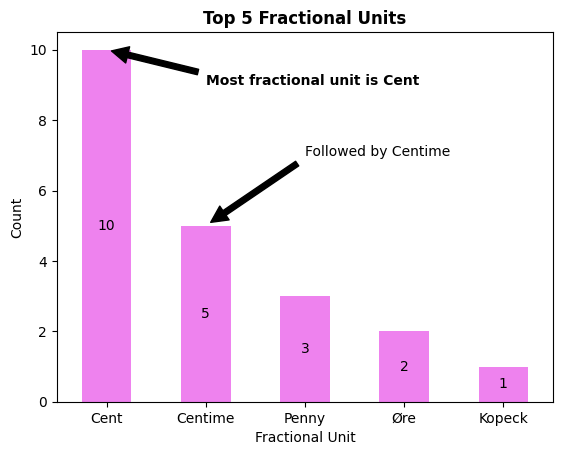

In [35]:
# Making top 5 Fractional Unit used
count_fractional_unit = wikipedia_data['Fractionalunit'].value_counts().sort_values(ascending=False)

# Making bar plot for those top 5
def making_figure(input, set_color, text_1, text_2):
  fig, ax = plt.subplots()
  input.head(5).plot(kind='bar', ax=ax, color=set_color)

  ax.set_ylabel('Count')
  ax.set_xlabel('Fractional Unit')
  ax.set_xticklabels(labels=input.index, rotation=0)

  ax.annotate(text_1, xy=(0,10), xytext=(1,9),
            arrowprops=dict(facecolor='black', shrink=0.05), fontweight='bold'
            )

  ax.annotate(text_2, xy=(1, 5), xytext=(2, 7),
            arrowprops=dict(facecolor='black', shrink=0.05)
            )

  ax.bar_label(ax.containers[0], label_type='center')


  ax.set_title('Top 5 Fractional Units', fontweight='bold')

  return fig.show()

making_figure(input=count_fractional_unit.head(5), set_color='violet',
              text_1='Most fractional unit is Cent',
              text_2=f'Followed by Centime')